# **Tugas 3 Machine Learning - Logistic Regression, K-Nearest Neighbor, Naïve Bayes, Decision Tree**
# Kelompok 7
## Anggota:
*   Nazwa Salsabila (2208107010010)
*   Rizky Yusmansyah (2208107010024)
*   Della Rahmatika (2208107010041)
*   Zuwi Pertiwi (2208107010061)
*   Berliani Utami (2208107010082)

## **Deskripsi Dataset:**
Dataset heart_2020_cleaned.csv berasal dari survei Behavioral Risk Factor Surveillance System (BRFSS) tahun 2020 yang dilakukan oleh CDC, mencakup lebih dari 319.000 responden dewasa di AS. Dataset ini merupakan hasil penyaringan dari survei kesehatan terbesar di dunia, yang awalnya memiliki hampir 300 variabel. Untuk keperluan analisis dan penerapan machine learning, khususnya klasifikasi, telah dipilih 18 fitur paling relevan yang mencerminkan indikator utama risiko penyakit jantung, seperti BMI, tekanan darah tinggi, kolesterol, merokok, diabetes, obesitas, aktivitas fisik, dan konsumsi alkohol. Target variabelnya adalah HeartDisease, yang bersifat biner.

Link dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease


Link Repository : https://github.com/rizkyyus/Kelompok_7_Tugas03_Classification

**Import Library**

Pada bagian ini, dilakukan import berbagai library yang diperlukan untuk analisis data, visualisasi, dan pemodelan machine learning:

- **Pandas dan NumPy**: Digunakan untuk manipulasi dan analisis data.
- **Matplotlib dan Seaborn**: Digunakan untuk visualisasi data.
- **Scikit-learn**:
  - *Model Selection*: Untuk membagi data, validasi silang, dan kurva pembelajaran.
  - *Preprocessing*: Untuk standarisasi dan encoding data.
  - *Models*: Logistic Regression, K-Nearest Neighbors, Naive Bayes, dan Decision Tree.
  - *Metrics*: Untuk evaluasi model seperti akurasi, confusion matrix, ROC, dll.
- **Warnings**: Untuk menyembunyikan peringatan yang tidak perlu selama eksekusi.


In [ ]:
#import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, validation_curve
import warnings
warnings.filterwarnings('ignore')

# Pemahaman Dataset

Setelah dataset dimuat, dilakukan beberapa langkah awal eksplorasi data:

- **Menampilkan jumlah baris dan kolom** menggunakan `.shape`.
- **Menampilkan lima data teratas** menggunakan `.head()`.
- **Melihat informasi tipe data dan missing values** menggunakan `.info()`.
- **Melihat statistik deskriptif** untuk kolom numerik menggunakan `.describe()`.

Langkah ini bertujuan untuk memahami struktur dan isi data sebelum dilakukan proses pembersihan dan analisis lebih lanjut.


In [ ]:
# URL dataset
url = "https://raw.githubusercontent.com/rizkyyus/Kelompok_7_Tugas03_Classification/refs/heads/main/heart_2020_cleaned.csv"

# Load dataset
df = pd.read_csv (url)

print("Menampilkan jumlah baris dan kolom")
print(df.shape)

print("\nMenampilkan beberapa data awal")
print(df.head())

print("\nInformasi dataset")
print(df.info())

print("\nStatistik deskriptif")
print(df.describe())

Menampilkan jumlah baris dan kolom
(319795, 18)

Menampilkan beberapa data awal
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0  

Pada tahap ini dilakukan pemahaman awal pada dataset untuk memahami distribusi dan hubungan antar fitur dengan variabel target. Visualisasi pertama menunjukkan distribusi kelas target `HeartDisease`, yang memperlihatkan proporsi antara individu yang memiliki penyakit jantung dan yang tidak.

Selanjutnya, dilakukan analisis distribusi berdasarkan kategori usia dan jenis kelamin. Hasil visualisasi menunjukkan bagaimana prevalensi penyakit jantung bervariasi di antara kelompok usia yang berbeda serta antara pria dan wanita.

Distribusi nilai BMI juga dianalisis untuk melihat kemungkinan hubungan antara indeks massa tubuh dan penyakit jantung. Digunakan histogram dengan *kernel density estimation* untuk menggambarkan pola distribusi berdasarkan status penyakit jantung.

Sebagai tambahan, dibuat *heatmap* untuk melihat korelasi antar fitur numerik, yaitu:
- BMI
- PhysicalHealth
- MentalHealth
- SleepTime

Visualisasi korelasi ini membantu mengidentifikasi fitur yang saling berkaitan dan bisa berdampak pada pemodelan di tahap selanjutnya.


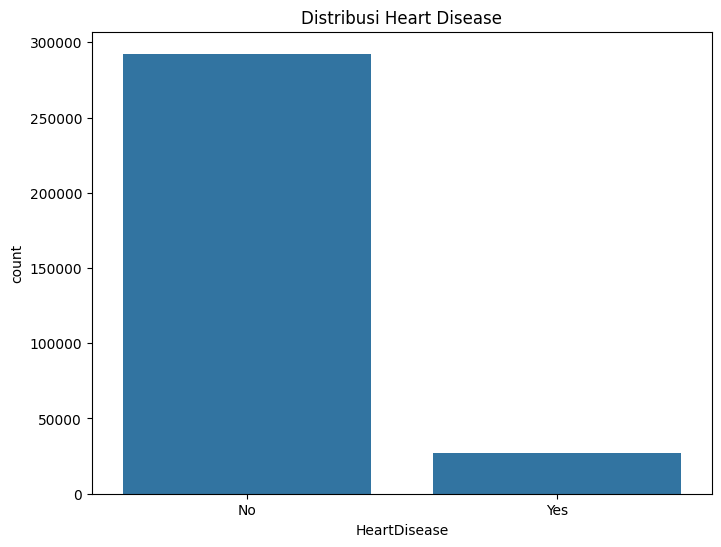

In [ ]:
# Memeriksa distribusi kelas target
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribusi Heart Disease')
plt.show()

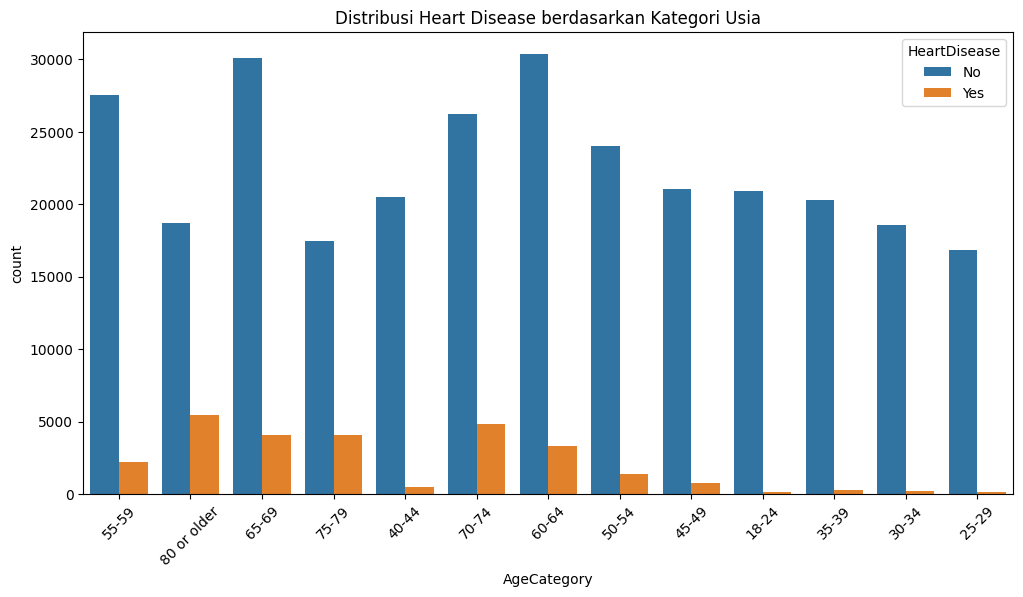

In [ ]:
# Cek distribusi usia
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeCategory', data=df, hue='HeartDisease')
plt.title('Distribusi Heart Disease berdasarkan Kategori Usia')
plt.xticks(rotation=45)
plt.show()

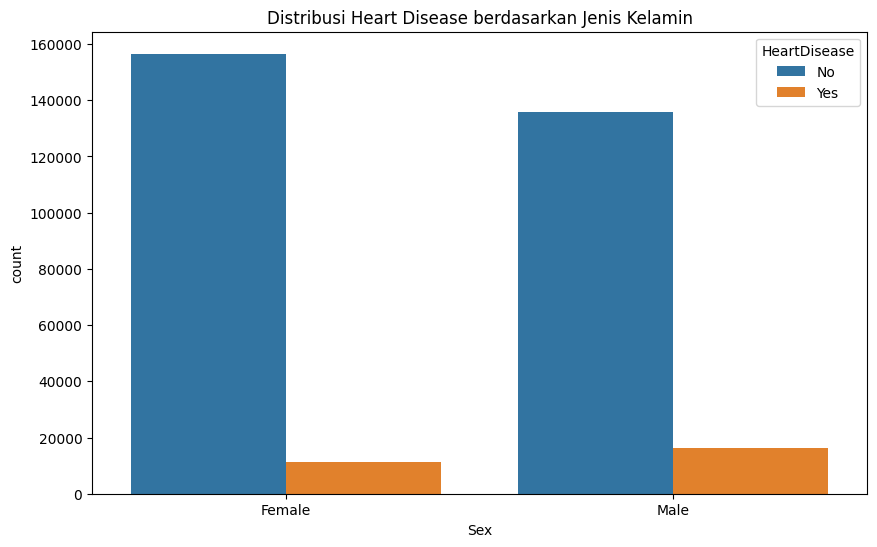

In [ ]:
# Distribusi berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df, hue='HeartDisease')
plt.title('Distribusi Heart Disease berdasarkan Jenis Kelamin')
plt.show()

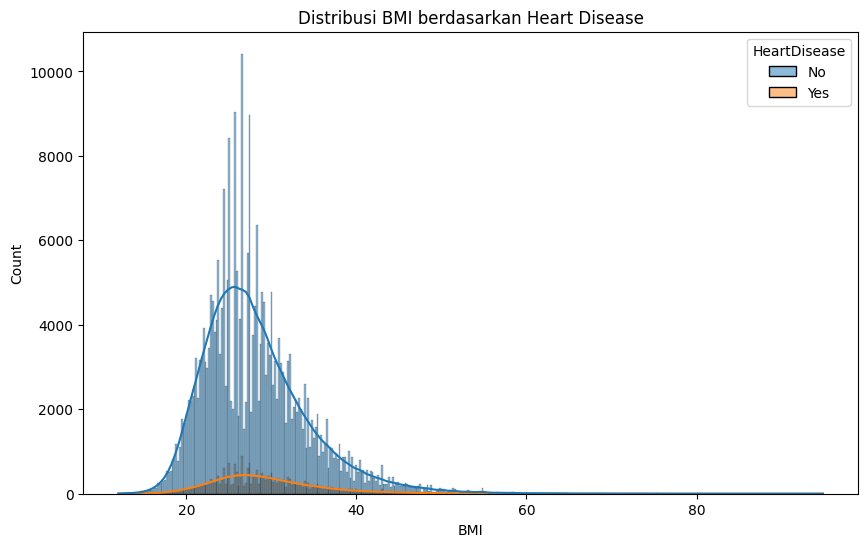

In [ ]:
# Distribusi BMI
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BMI', hue='HeartDisease', kde=True)
plt.title('Distribusi BMI berdasarkan Heart Disease')
plt.show()

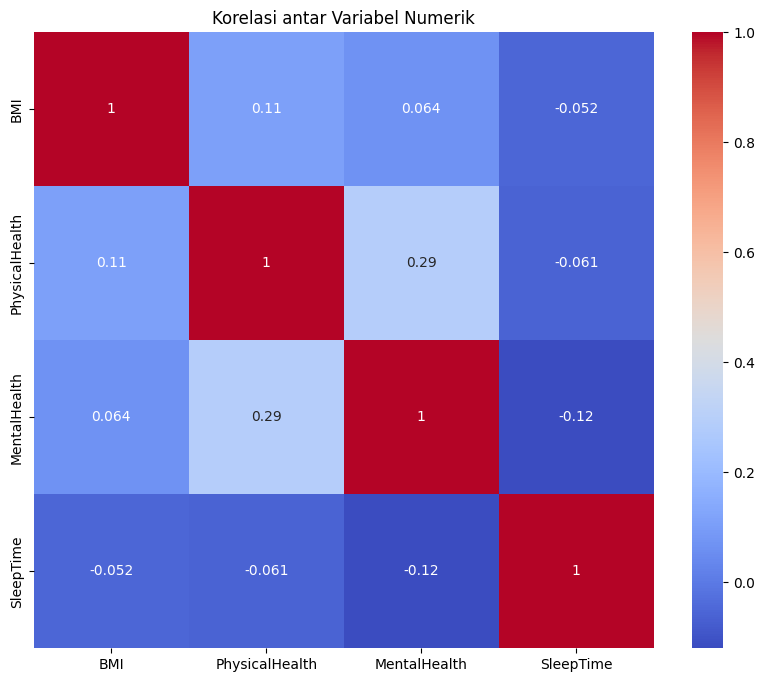

In [ ]:
# Korelasi antara variabel numerik
numerical_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Variabel Numerik')
plt.show()

Visualisasi awal menunjukkan bahwa mayoritas individu dalam dataset **tidak memiliki penyakit jantung**. Hal ini menandakan adanya **ketidakseimbangan** kelas yang cukup signifikan. Oleh karena itu, saat membangun model prediksi, penting untuk tidak hanya bergantung pada akurasi, tetapi juga mempertimbangkan metrik lain seperti precision, recall, dan F1-score, khususnya untuk kelas minoritas.

Distribusi berdasarkan kategori usia menunjukkan bahwa semakin tua usia seseorang, semakin tinggi propensi untuk mengalami penyakit jantung. **Usia menjadi salah satu fitur yang paling berpengaruh dalam prediksi**. Selain itu, meskipun jumlah perempuan dalam dataset lebih banyak, laki-laki memiliki prevalensi penyakit jantung yang sedikit lebih tinggi. Artinya, **jenis kelamin juga relevan sebagai variabel prediktor**.

Dari segi BMI, terdapat kecenderungan bahwa individu dengan penyakit jantung memiliki nilai BMI yang sedikit lebih tinggi, meskipun distribusinya banyak tumpang tindih dengan kelompok tanpa penyakit. Ini menunjukkan bahwa **BMI** memiliki kontribusi, namun **tidak cukup kuat** jika digunakan sendiri sebagai prediktor.

Heatmap korelasi antar variabel numerik menunjukkan bahwa **tidak ada korelasi yang kuat antar fitur**. Korelasi tertinggi ditemukan antara variabel PhysicalHealth dan MentalHealth, meskipun nilainya masih tergolong lemah. Fitur-fitur seperti BMI dan SleepTime tidak menunjukkan hubungan linier yang berarti dengan fitur lainnya.


# Eksplorasi Data dan Pra-pemrosesan

Sebelum membangun model, dilakukan serangkaian langkah pra-pemrosesan untuk mempersiapkan data agar sesuai untuk proses pelatihan. Pertama, diperiksa apakah terdapat *missing values* pada dataset, dan hasilnya menunjukkan bahwa tidak ada nilai yang hilang. Selanjutnya, dilihat tipe data dari setiap kolom untuk memastikan semua fitur berada dalam format yang sesuai.

Karena sebagian besar fitur merupakan variabel kategorikal, dilakukan proses encoding menggunakan `LabelEncoder` dari scikit-learn. Proses ini diterapkan pada fitur-fitur kategorikal seperti `Smoking`, `AlcoholDrinking`, `Stroke`, `Sex`, `Race`, dan lainnya, termasuk variabel target `HeartDisease` yang dikonversi menjadi nilai numerik biner.

Setelah encoding, dilakukan analisis korelasi antara semua fitur dengan target. Korelasi divisualisasikan menggunakan *heatmap*, untuk mengidentifikasi fitur mana yang memiliki hubungan paling kuat terhadap keberadaan penyakit jantung.

Langkah selanjutnya adalah memisahkan data menjadi fitur (`X`) dan target (`y`), kemudian membaginya menjadi data pelatihan dan pengujian menggunakan `train_test_split` dengan rasio 80:20. Terakhir, dilakukan standardisasi terhadap fitur numerik seperti `BMI`, `PhysicalHealth`, `MentalHealth`, dan `SleepTime` agar memiliki skala yang seragam, yang penting untuk model-model tertentu seperti regresi logistik atau KNN.


In [ ]:
# Memeriksa missing values
print("Missing values per kolom:")
print(df.isnull().sum())

Missing values per kolom:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [ ]:
# Mengecek tipe data dan melakukan konversi jika diperlukan
print("\nTipe data masing-masing kolom:")
print(df.dtypes)


Tipe data masing-masing kolom:
HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


In [ ]:
# Encoding variabel kategorikal
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                        'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                        'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [ ]:
# Membuat encoder
le = LabelEncoder()

In [ ]:
# Buat salinan dataframe untuk menghindari warning
df_encoded = df.copy()

In [ ]:
# Encode target variable
df_encoded['HeartDisease'] = le.fit_transform(df_encoded['HeartDisease'])

In [ ]:
# Encode categorical features
for feature in categorical_features:
    df_encoded[feature] = le.fit_transform(df_encoded[feature])

In [ ]:
# Cek hasil encoding
print("\nDataframe setelah encoding:")
print(df_encoded.head())


Dataframe setelah encoding:
   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            7     5         2   
1           0.0            0    0           12     5         0   
2          30.0            0    1            9     5         2   
3           0.0            0    0           11     5         0   
4           0.0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4        

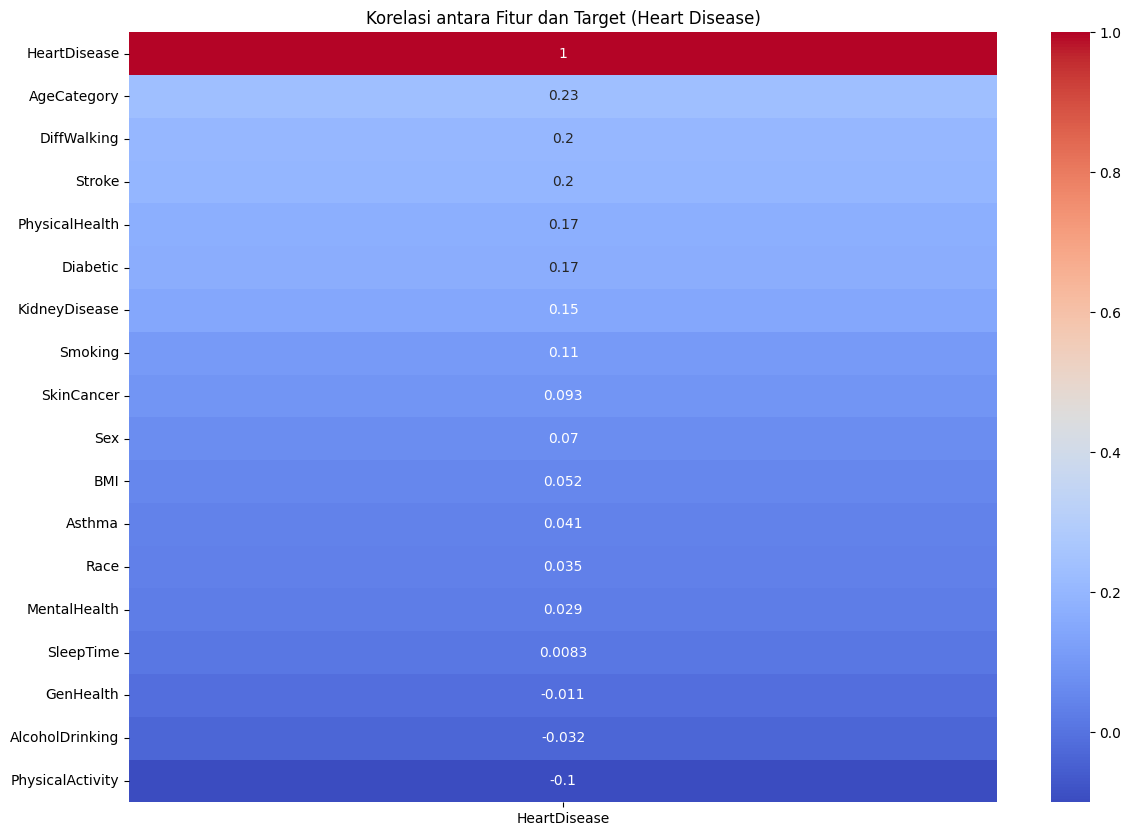

In [ ]:
# Analisis korelasi dengan target
plt.figure(figsize=(14, 10))
correlation = df_encoded.corr()['HeartDisease'].sort_values(ascending=False)
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Fitur dan Target (Heart Disease)')
plt.show()

In [ ]:
# Split data into features and target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardisasi fitur numerik
scaler = StandardScaler()
numerical_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Implementasi Model dan Evaluasi

##Model 1: Logistic Regression

Pada tahap ini, dilakukan pelatihan model klasifikasi menggunakan algoritma Logistic Regression. Model diinisialisasi dengan parameter `max_iter=1000` untuk memastikan proses konvergensi berjalan dengan baik, dan `random_state=42` untuk menjaga hasil yang konsisten.

Setelah model dilatih menggunakan data pelatihan, dilakukan prediksi terhadap data uji, baik dalam bentuk label prediksi (`y_pred_lr`) maupun probabilitas kelas positif (`y_prob_lr`), yang akan digunakan untuk evaluasi berbasis probabilitas seperti ROC AUC.

Sebagai tambahan, dilakukan validasi silang (*cross-validation*) sebanyak 5 fold untuk mengukur performa model secara umum dan menghindari overfitting. Skor yang diukur adalah akurasi pada setiap fold, yang kemudian dapat dirata-rata untuk mendapatkan gambaran stabilitas model.


In [ ]:
# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train model
lr_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')

##Evaluasi Model Logistic Regression

Model dievaluasi menggunakan berbagai metrik seperti akurasi, confusion matrix, dan classification report. Confusion matrix divisualisasikan untuk melihat distribusi prediksi benar dan salah pada masing-masing kelas.

ROC curve digunakan untuk menilai performa berdasarkan probabilitas, dengan nilai AUC sebagai ukuran kemampuan model membedakan kelas. Selain itu, dihitung juga log loss untuk melihat kualitas prediksi probabilistik.

Hasil validasi silang (cross-validation) disajikan untuk mengevaluasi kestabilan model, dan analisis koefisien dilakukan untuk mengidentifikasi fitur-fitur yang paling berpengaruh terhadap prediksi.


Model Logistic Regression:
Accuracy: 0.9128035147516378

Confusion Matrix:
[[57901   466]
 [ 5111   481]]


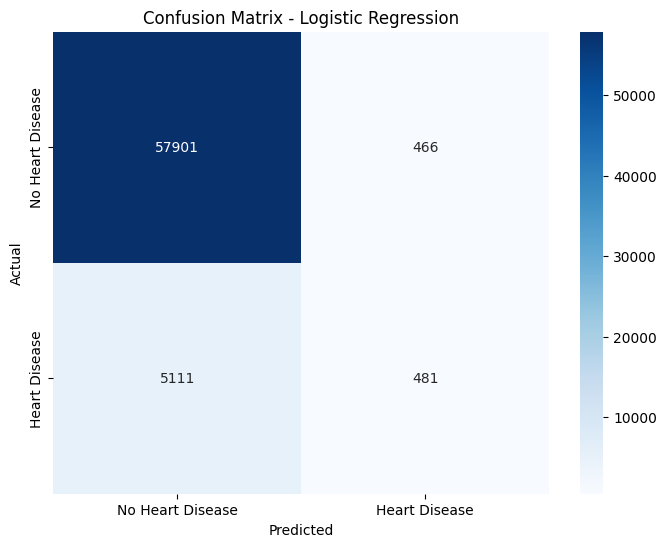


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.51      0.09      0.15      5592

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.88      0.91      0.88     63959



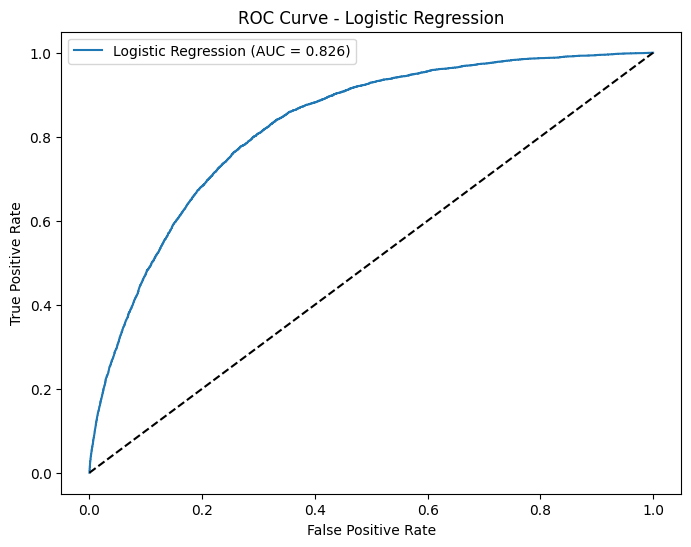

Log Loss: 0.2376
Cross-validation accuracy: 0.9150 (±0.0005)


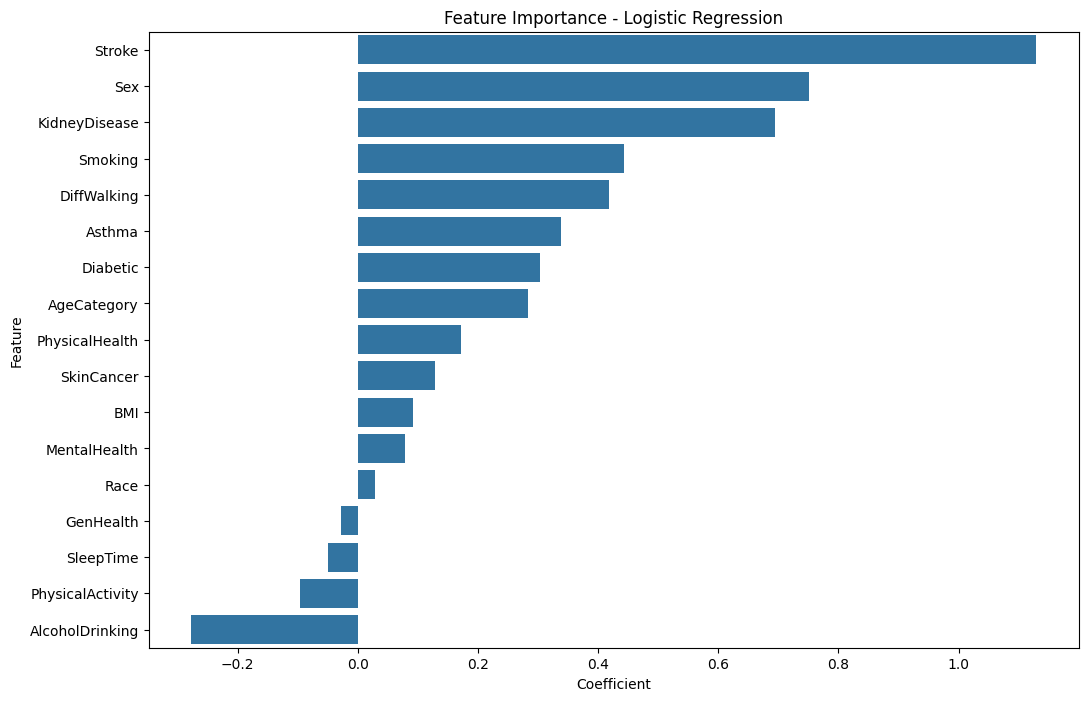

In [ ]:
# Evaluasi model
print("Model Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# Loss value
loss_lr = log_loss(y_test, y_prob_lr)
print(f"Log Loss: {loss_lr:.4f}")

# Cross-validation results
print(f"Cross-validation accuracy: {np.mean(cv_scores_lr):.4f} (±{np.std(cv_scores_lr):.4f})")

# Feature importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance - Logistic Regression')
plt.show()

##Model 2: K-Nearest Neighbors (KNN)

Model KNN diinisialisasi dengan `n_neighbors=5`, lalu dilatih menggunakan data pelatihan. Setelah itu, dilakukan prediksi terhadap data uji, baik dalam bentuk label maupun probabilitas.

Sebagai tambahan, dilakukan validasi silang 5-fold untuk mengukur performa dan konsistensi model dalam hal akurasi.


In [ ]:
# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train model
knn_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Cross-validation
cv_scores_knn = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

## Evaluasi Model KNN

Model KNN dievaluasi menggunakan akurasi, confusion matrix, dan classification report untuk mengukur performa klasifikasi. Visualisasi confusion matrix membantu memahami distribusi prediksi terhadap masing-masing kelas.

ROC curve dan nilai AUC digunakan untuk mengevaluasi kemampuan model membedakan antara kelas positif dan negatif. Selain itu, dihitung juga log loss untuk menilai akurasi prediksi probabilistik.

Hasil validasi silang 5-fold disajikan untuk melihat kestabilan model. Terakhir, dilakukan analisis performa KNN terhadap berbagai nilai `k` untuk mencari parameter `k` yang menghasilkan akurasi terbaik.


Model K-Nearest Neighbors:
Accuracy: 0.904344970997045

Confusion Matrix:
[[57253  1114]
 [ 5004   588]]


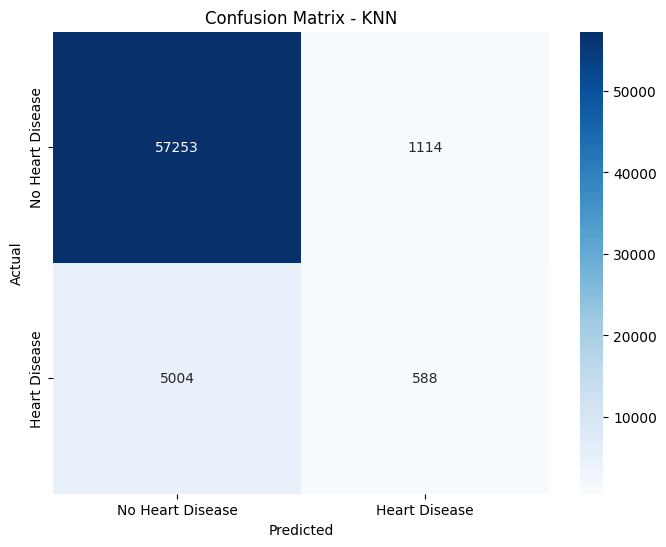


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.35      0.11      0.16      5592

    accuracy                           0.90     63959
   macro avg       0.63      0.54      0.56     63959
weighted avg       0.87      0.90      0.88     63959



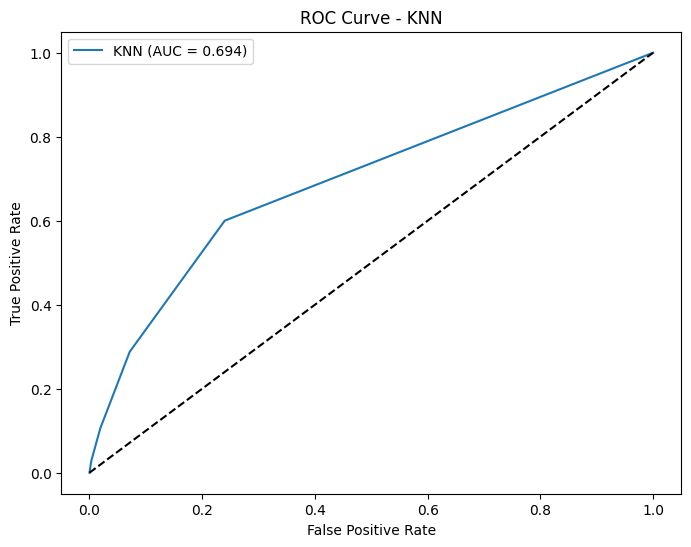

Log Loss: 1.4112
Cross-validation accuracy: 0.9065 (±0.0006)


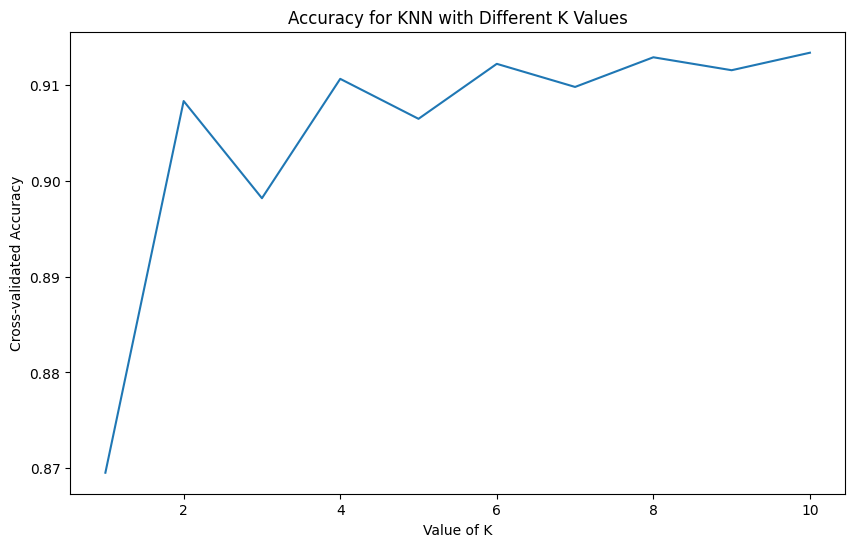

In [ ]:
# Evaluasi model
print("Model K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()

# Loss value
loss_knn = log_loss(y_test, y_prob_knn)
print(f"Log Loss: {loss_knn:.4f}")

# Cross-validation results
print(f"Cross-validation accuracy: {np.mean(cv_scores_knn):.4f} (±{np.std(cv_scores_knn):.4f})")

# Performa KNN dengan berbagai nilai k
k_range = range(1, 11)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(np.mean(scores))

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross-validated Accuracy')
plt.title('Accuracy for KNN with Different K Values')
plt.show()

##Model 3: Naive Bayes

Model Gaussian Naive Bayes diinisialisasi dan dilatih menggunakan data pelatihan. Setelah pelatihan, dilakukan prediksi terhadap data uji dalam bentuk label dan probabilitas.

Sebagai tambahan, dilakukan validasi silang 5-fold untuk mengevaluasi performa model secara umum menggunakan metrik akurasi.


In [ ]:
# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Train model
nb_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

# Cross-validation
cv_scores_nb = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')

## Evaluasi Model Naive Bayes

## Evaluasi Model Naive Bayes

Evaluasi model Naive Bayes mencakup akurasi, confusion matrix, dan classification report untuk menilai performa klasifikasi. Confusion matrix divisualisasikan untuk memperjelas distribusi prediksi.

ROC curve digunakan untuk menilai kemampuan model dalam membedakan antara kelas, dengan AUC sebagai indikator utama. Nilai log loss dihitung untuk mengevaluasi seberapa baik model memprediksi probabilitas kelas.

Akurasi rata-rata dari validasi silang 5-fold juga ditampilkan untuk melihat konsistensi performa model di berbagai subset data.


Model Naive Bayes:
Accuracy: 0.8431182476273863

Confusion Matrix:
[[51393  6974]
 [ 3060  2532]]


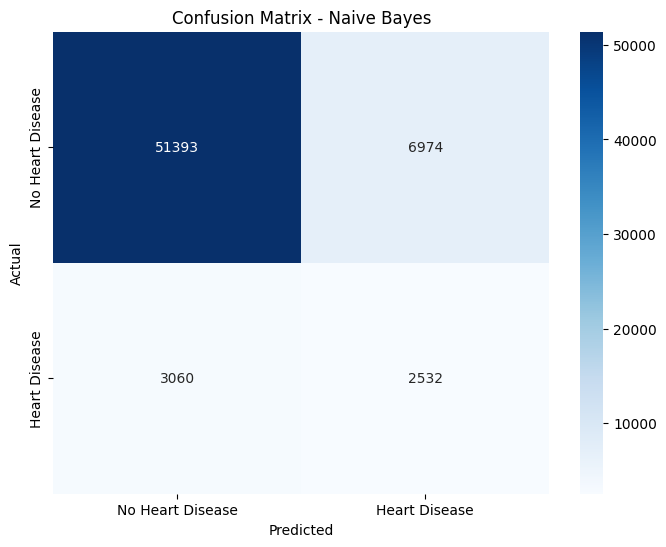


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     58367
           1       0.27      0.45      0.34      5592

    accuracy                           0.84     63959
   macro avg       0.61      0.67      0.62     63959
weighted avg       0.88      0.84      0.86     63959



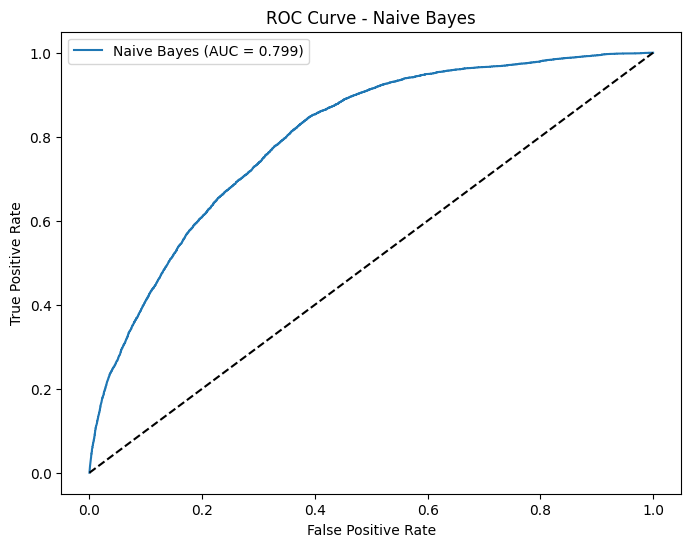

Log Loss: 1.0629
Cross-validation accuracy: 0.8463 (±0.0034)


In [ ]:
# Evaluasi model
print("Model Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:")
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

# Loss value
loss_nb = log_loss(y_test, y_prob_nb)
print(f"Log Loss: {loss_nb:.4f}")

# Cross-validation results
print(f"Cross-validation accuracy: {np.mean(cv_scores_nb):.4f} (±{np.std(cv_scores_nb):.4f})")

##Model 4: Decision Tree

Model Decision Tree diinisialisasi dengan `random_state=42` dan dilatih menggunakan data pelatihan. Setelah pelatihan, dilakukan prediksi pada data uji untuk menghasilkan label dan probabilitas.

Validasi silang 5-fold juga dilakukan untuk mengevaluasi performa model secara umum dengan metrik akurasi.


In [ ]:
# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Train model
dt_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Cross-validation
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')

## Evaluasi Model Decision Tree

Model Decision Tree dievaluasi menggunakan beberapa metrik utama: akurasi, confusion matrix, dan classification report. Visualisasi confusion matrix memberikan gambaran yang jelas tentang kesalahan klasifikasi.

ROC curve digunakan untuk menilai kemampuan model dalam memisahkan kelas positif dan negatif, dengan AUC sebagai indikator performa. Log loss dihitung untuk menilai kualitas prediksi probabilistik.

Hasil validasi silang 5-fold ditampilkan untuk mengukur kestabilan model. Selain itu, fitur yang paling berpengaruh terhadap prediksi divisualisasikan menggunakan feature importance untuk memberikan wawasan tentang variabel yang paling berkontribusi dalam keputusan model.


Model Decision Tree:
Accuracy: 0.862630747822824

Confusion Matrix:
[[53748  4619]
 [ 4167  1425]]


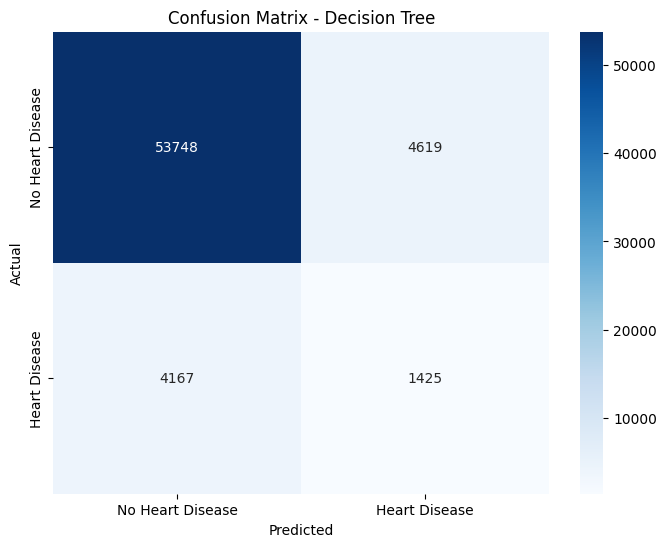


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     58367
           1       0.24      0.25      0.24      5592

    accuracy                           0.86     63959
   macro avg       0.58      0.59      0.58     63959
weighted avg       0.87      0.86      0.87     63959



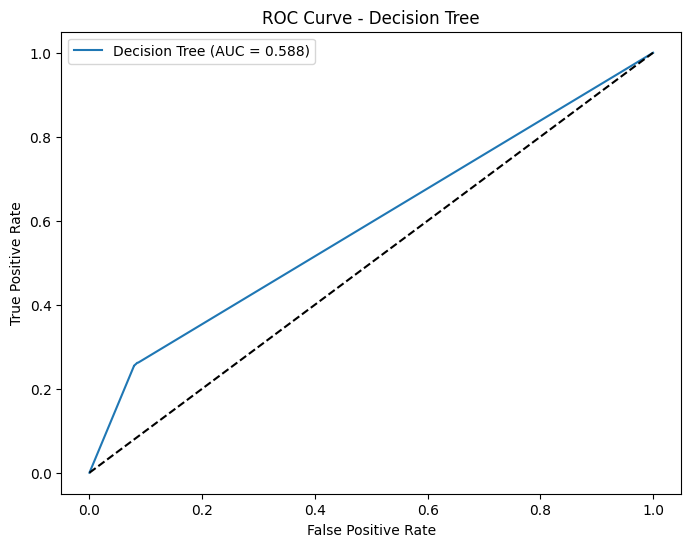

Log Loss: 4.9288
Cross-validation accuracy: 0.8643 (±0.0021)


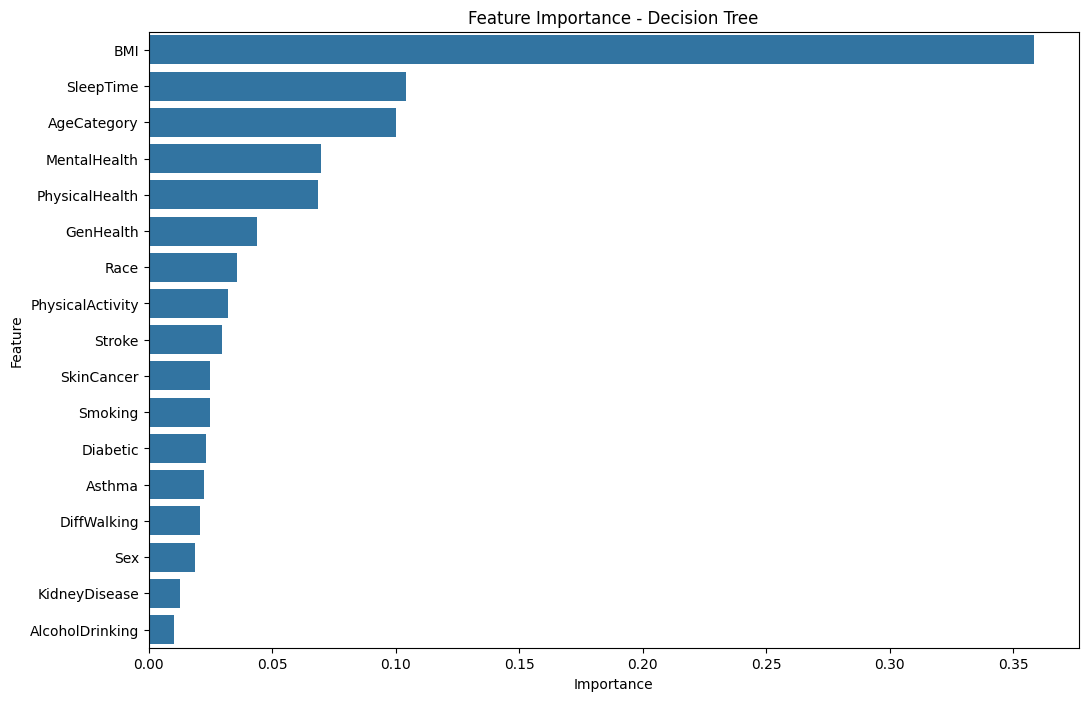

In [ ]:
# Evaluasi model
print("Model Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

# Loss value
loss_dt = log_loss(y_test, y_prob_dt)
print(f"Log Loss: {loss_dt:.4f}")

# Cross-validation results
print(f"Cross-validation accuracy: {np.mean(cv_scores_dt):.4f} (±{np.std(cv_scores_dt):.4f})")

# Feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Decision Tree')
plt.show()

# Perbandingan Model

Empat model dibandingkan: Logistic Regression, KNN, Naive Bayes, dan Decision Tree. Perbandingan dilakukan berdasarkan akurasi, AUC (ROC curve), log loss, dan hasil cross-validation. Logistic Regression memiliki performa terbaik secara umum dari segi akurasi, AUC, dan stabilitas (CV). Visualisasi grafik menunjukkan perbedaan kinerja masing-masing model. Hasil lengkap ditampilkan dalam bentuk tabel untuk memudahkan interpretasi dan pemilihan model terbaik.


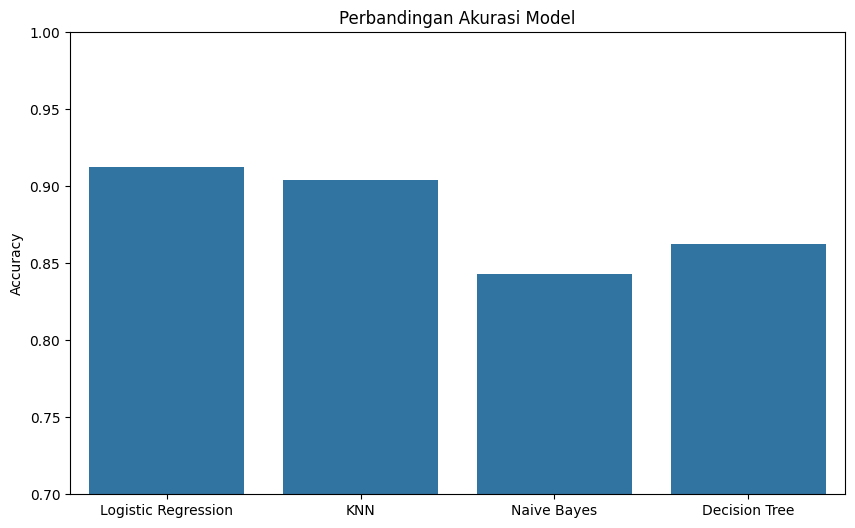

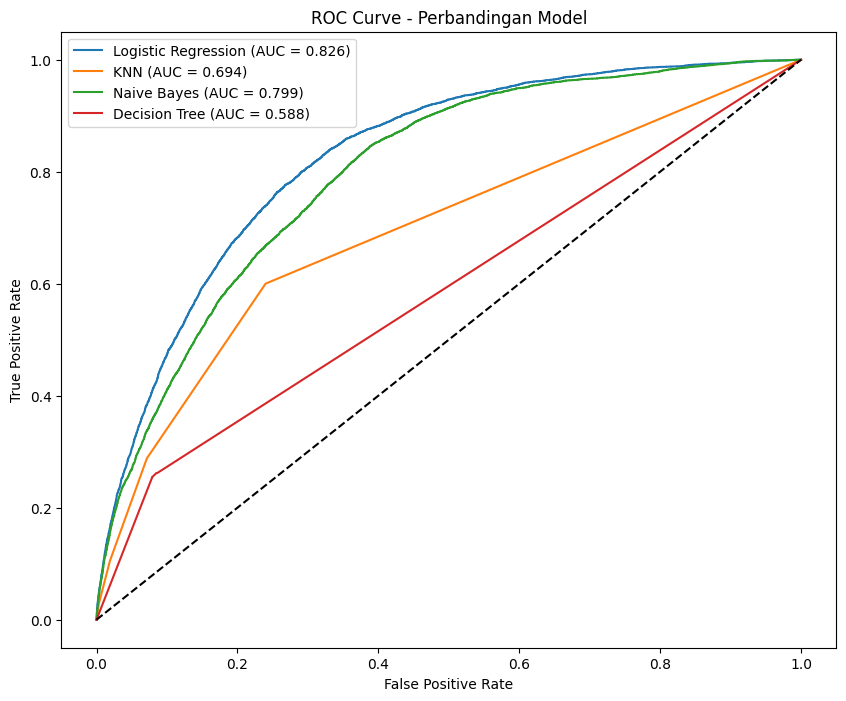

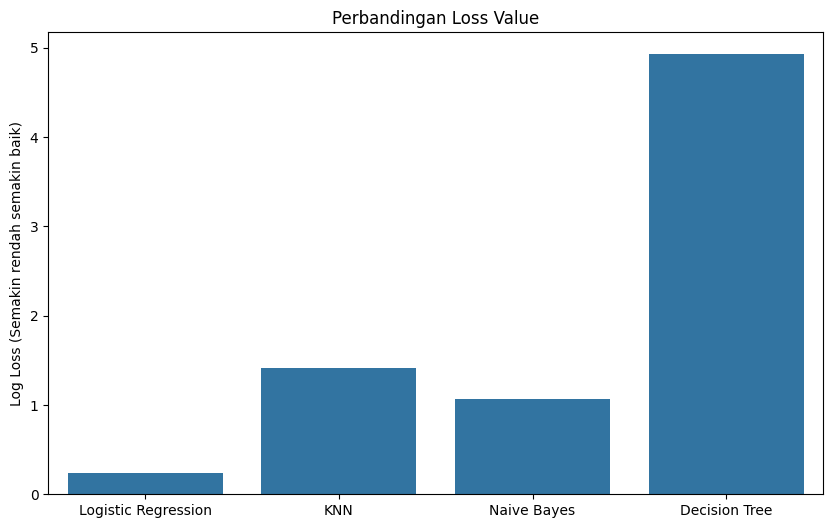

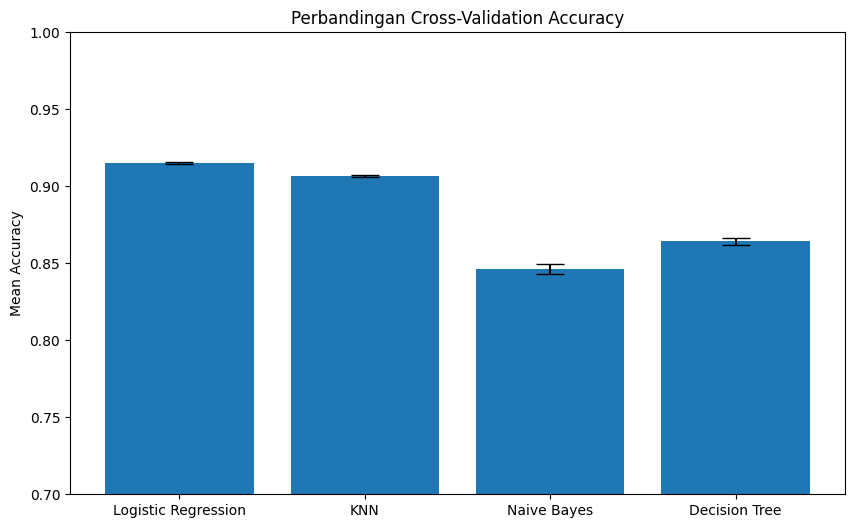

Perbandingan Hasil Model:
                 Model  Accuracy       AUC  Log Loss  CV Mean Accuracy  \
0  Logistic Regression  0.912804  0.826229  0.237576          0.914967   
1                  KNN  0.904345  0.694298  1.411226          0.906474   
3        Decision Tree  0.862631  0.588476  4.928802          0.864251   
2          Naive Bayes  0.843118  0.798735  1.062875          0.846264   

   CV Std Dev  
0    0.000492  
1    0.000552  
3    0.002082  
2    0.003431  


In [ ]:
# Perbandingan akurasi
models = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree']
accuracy_scores = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_dt)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_scores)
plt.ylim(0.7, 1.0)
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy')
plt.show()

# Perbandingan ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Perbandingan Model')
plt.legend()
plt.show()

# Perbandingan loss
loss_values = [loss_lr, loss_knn, loss_nb, loss_dt]
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=loss_values)
plt.title('Perbandingan Loss Value')
plt.ylabel('Log Loss (Semakin rendah semakin baik)')
plt.show()

# Perbandingan cross-validation
cv_means = [
    np.mean(cv_scores_lr),
    np.mean(cv_scores_knn),
    np.mean(cv_scores_nb),
    np.mean(cv_scores_dt)
]
cv_stds = [
    np.std(cv_scores_lr),
    np.std(cv_scores_knn),
    np.std(cv_scores_nb),
    np.std(cv_scores_dt)
]

plt.figure(figsize=(10, 6))
plt.bar(models, cv_means, yerr=cv_stds, capsize=10)
plt.ylim(0.7, 1.0)
plt.title('Perbandingan Cross-Validation Accuracy')
plt.ylabel('Mean Accuracy')
plt.show()

# Tabel hasil perbandingan
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'AUC': [auc_lr, auc_knn, auc_nb, auc_dt],
    'Log Loss': loss_values,
    'CV Mean Accuracy': cv_means,
    'CV Std Dev': cv_stds
})

print("Perbandingan Hasil Model:")
print(comparison_df.sort_values('Accuracy', ascending=False))

Logistic Regression menjadi pilihan terbaik untuk data ini, tetapi semua model masih lemah dalam mendeteksi kelas minoritas. Perlu perbaikan seperti penyeimbangan data (SMOTE, class weight) dan eksplorasi model lain seperti Random Forest atau XGBoost untuk meningkatkan kemampuan deteksi kasus positif.

# Analisis Hasil

**Learning & Validation Curves**

Learning curve digunakan untuk menampilkan hubungan antara jumlah data latih dengan akurasi model. Membantu mengidentifikasi overfitting atau underfitting. Menggunakan learning_curve() dan visualisasi dilakukan dengan Matplotlib.

Validation curve digunakan untuk melihat pengaruh parameter terhadap performa model, yaitu hubungan antara nilai hyperparameter tertentu dengan akurasi model. Cocok untuk memilih nilai parameter terbaik. Menggunakan validation_curve() dan bisa pakai skala logaritmik jika diperlukan.



 Generating Learning Curves (cv=3, 5 steps) 


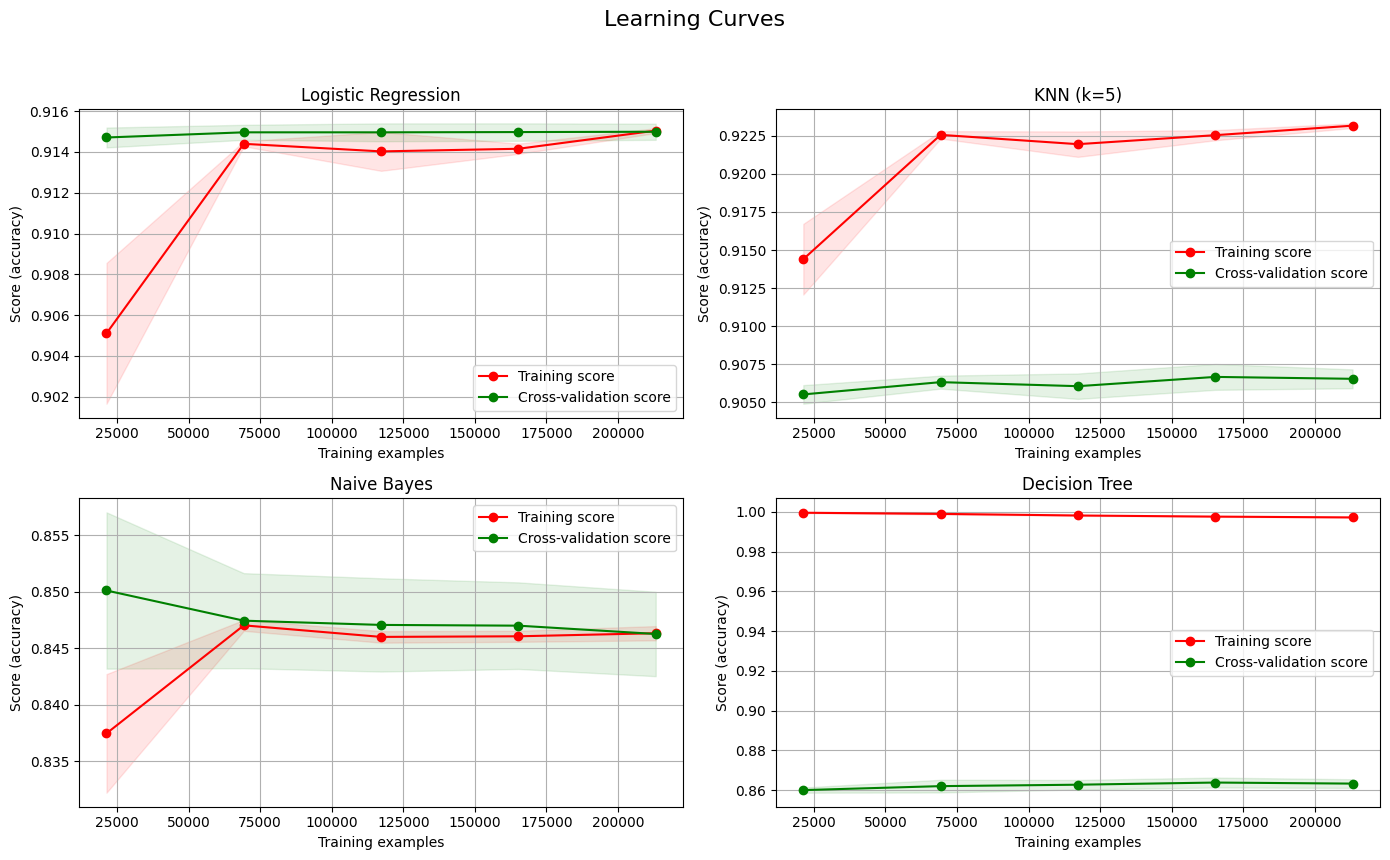


 Generating Validation Curves (cv=3) 


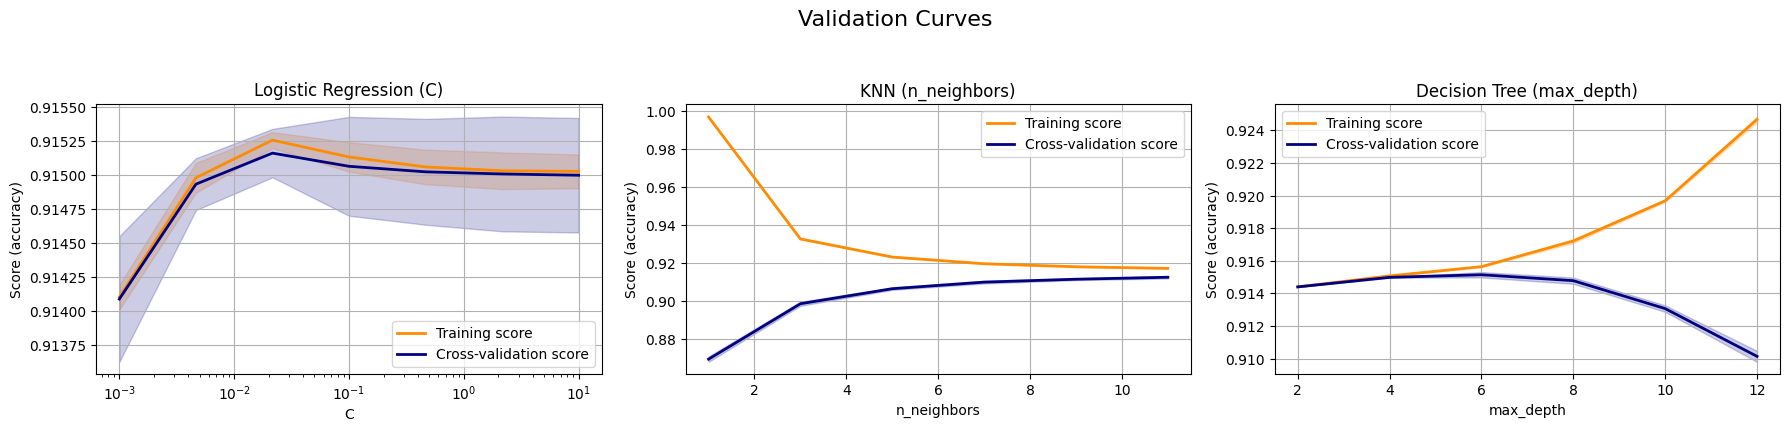

In [ ]:
# Model Fit (Learning & Validation Curves)

def plot_learning_curve_eff(estimator, title, X, y, axes=None, ylim=None, cv=3,
                            n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(7, 4))
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel(f"Score ({scoring})")
    try:
        train_sizes, train_scores, test_scores = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes, scoring=scoring, random_state=42)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        axes.grid(True)
        axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                             train_scores_mean + train_scores_std, alpha=0.1, color="r")
        axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1, color="g")
        axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
        axes.legend(loc="best")
    except Exception as e:
        print(f"Error plotting learning curve for {title}: {e}")
        axes.text(0.5, 0.5, 'Error', ha='center', va='center')
    return plt

def plot_validation_curve_eff(estimator, title, X, y, param_name, param_range, axes=None,
                              ylim=None, cv=3, n_jobs=-1, scoring='accuracy', use_semilogx=False):
    try:
        train_scores, test_scores = validation_curve(
            estimator, X, y, param_name=param_name, param_range=param_range,
            cv=cv, scoring=scoring, n_jobs=n_jobs)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        if axes is None:
            _, axes = plt.subplots(1, 1, figsize=(7, 4))
        axes.set_title(title)
        axes.set_xlabel(param_name)
        axes.set_ylabel(f"Score ({scoring})")
        if ylim is not None:
            axes.set_ylim(*ylim)
        plot_func = axes.semilogx if use_semilogx else axes.plot
        plot_func(param_range, train_scores_mean, label="Training score", color="darkorange", lw=2)
        axes.fill_between(param_range, train_scores_mean - train_scores_std,
                           train_scores_mean + train_scores_std, alpha=0.2, color="darkorange")
        plot_func(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=2)
        axes.fill_between(param_range, test_scores_mean - test_scores_std,
                           test_scores_mean + test_scores_std, alpha=0.2, color="navy")
        axes.legend(loc="best")
        axes.grid(True)
    except Exception as e:
        print(f"Error plotting validation curve for {title}: {e}")
        axes.text(0.5, 0.5, 'Error', ha='center', va='center')
    return plt

#  Inisialisasi Model (Untuk Plotting Curves)
lr_curve = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
knn_curve = KNeighborsClassifier(n_neighbors=5)
nb_curve = GaussianNB()
dt_curve = DecisionTreeClassifier(random_state=42)

#  Plot Learning Curves
print("\n Generating Learning Curves (cv=3, 5 steps) ")
fig_lc, axes_lc = plt.subplots(2, 2, figsize=(14, 9))
fig_lc.suptitle('Learning Curves', fontsize=16)
plot_learning_curve_eff(lr_curve, "Logistic Regression", X, y, axes=axes_lc[0, 0], cv=3, n_jobs=-1)
plot_learning_curve_eff(knn_curve, "KNN (k=5)", X, y, axes=axes_lc[0, 1], cv=3, n_jobs=-1)
plot_learning_curve_eff(nb_curve, "Naive Bayes", X, y, axes=axes_lc[1, 0], cv=3, n_jobs=-1)
plot_learning_curve_eff(dt_curve, "Decision Tree", X, y, axes=axes_lc[1, 1], cv=3, n_jobs=-1)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#  Plot Validation Curves
print("\n Generating Validation Curves (cv=3) ")
param_range_lr_eff = np.logspace(-3, 1, 7)
param_range_knn_eff = np.arange(1, 12, 2)
param_range_dt_eff = np.arange(2, 13, 2)

fig_vc, axes_vc = plt.subplots(1, 3, figsize=(18, 4.5))
fig_vc.suptitle('Validation Curves', fontsize=16)

# Inisialisasi model untuk validation_curve
lr_val_curve = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
knn_val_curve = KNeighborsClassifier()
dt_val_curve = DecisionTreeClassifier(random_state=42)

plot_validation_curve_eff(lr_val_curve, "Logistic Regression (C)", X, y,
                          param_name="C", param_range=param_range_lr_eff, cv=3,
                          scoring='accuracy', use_semilogx=True, axes=axes_vc[0])

plot_validation_curve_eff(knn_val_curve, "KNN (n_neighbors)", X, y,
                          param_name="n_neighbors", param_range=param_range_knn_eff, cv=3,
                          scoring='accuracy', use_semilogx=False, axes=axes_vc[1])

plot_validation_curve_eff(dt_val_curve, "Decision Tree (max_depth)", X, y,
                          param_name="max_depth", param_range=param_range_dt_eff, cv=3,
                          scoring='accuracy', use_semilogx=False, axes=axes_vc[2])

plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()

**Analisis Learning dan Validation Curve**

Berdasarkan learning curve, Logistic Regression menunjukkan performa paling stabil dengan perbedaan kecil antara akurasi pelatihan dan validasi, mengindikasikan generalisasi yang baik. KNN dan Decision Tree memiliki akurasi pelatihan tinggi namun akurasi validasi jauh lebih rendah, menunjukkan overfitting. Sementara itu, Naive Bayes memiliki akurasi yang konsisten namun rendah pada kedua kurva, menandakan underfitting.

Pada validation curve, performa Logistic Regression paling optimal pada nilai C sekitar 0.1 hingga 1. KNN menunjukkan performa terbaik di sekitar jumlah tetangga k=5, dan semakin buruk jika k terlalu kecil atau terlalu besar. Decision Tree memperlihatkan overfitting saat kedalaman pohon melebihi 6, ditandai dengan akurasi pelatihan yang naik dan akurasi validasi yang turun.

Secara keseluruhan, Logistic Regression merupakan model yang paling seimbang antara bias dan varians. KNN dan Decision Tree perlu penyetelan parameter lebih lanjut atau regularisasi tambahan, sementara Naive Bayes terlalu sederhana untuk menangkap kompleksitas data.


**Analisis perbandingan performa dari keempat model** klasifikasi yang digunakan (Logistic Regression, K-Nearest Neighbors, Naive Bayes, Decision Tree) untuk memprediksi HeartDisease didasarkan pada metrik evaluasi standar seperti **Akurasi, Confusion Matrix, Classification Report, ROC AUC, Log Loss, dan hasil Cross-Validation.**

Berdasarkan hal tersebut, diperoleh:
1.  **Akurasi & Cross-Validation (CV) Accuracy:**
    *   Grafik batang yang menampilkan **Perbandingan Akurasi Model** dan **Perbandingan Akurasi Cross-Validation**, bersama dengan tabel ringkasan, secara konsisten menunjukkan bahwa **Logistic Regression** memiliki performa akurasi terbaik. Model ini mencapai akurasi pengujian sekitar 91,28% dan rata-rata akurasi cross-validation sebesar 91,50%. Nilai deviasi standar yang sangat kecil pada cross-validation (sekitar 0,0005) juga menunjukkan bahwa performa model ini stabil pada berbagai pembagian data.
    *   **KNN** berada di posisi kedua, dengan akurasi yang sedikit lebih rendah (Akurasi tes ≈ 90.43%, Rata-rata CV Akurasi ≈ 90.65%) dan juga stabilitas yang baik (CV Std Dev ≈ 0.0006).
    *   Model **Decision Tree** (akurasi sekitar 86,3%, rata-rata akurasi cross-validation sekitar 86,4%) dan **Naive Bayes** (akurasi sekitar 84,3%, rata-rata cross-validation sekitar 84,6%) menunjukkan performa akurasi yang lebih rendah dibandingkan model lainnya. Di antara semua model, **Naive Bayes** memiliki tingkat variabilitas performa tertinggi pada cross-validation, yang terlihat dari nilai deviasi standar sebesar sekitar 0,0034.

2.  **ROC AUC:**
    *   Grafik **ROC Curve - Perbandingan Model** menggambarkan seberapa baik masing-masing model dapat membedakan antara kelas positif (Heart Disease) dan negatif (No Heart Disease). Semakin tinggi nilai AUC (Area Under the Curve) yang ditunjukkan oleh kurva yang mendekati sudut kiri atas grafik, maka semakin baik kemampuan model dalam melakukan diskriminasi antara kedua kelas tersebut.
    *   **Logistic Regression (AUC ≈ 0.826)** memiliki AUC tertinggi, menunjukkan kemampuan terbaik dalam membedakan kelas.
    *   **Naive Bayes (AUC ≈ 0.799)** menunjukkan performa diskriminasi yang baik, hampir setara dengan Logistic Regression.
    *   **KNN (AUC ≈ 0.694)** memiliki performa yang sedang.
    *   **Decision Tree (AUC ≈ 0.588)** menunjukkan performa yang sangat buruk, hanya sedikit lebih baik dari tebakan acak (AUC 0.5), mengindikasikan kesulitan besar dalam membedakan antara pasien dengan dan tanpa penyakit jantung.

3.  **Log Loss:**
    *   Grafik **Perbandingan Loss Value** menampilkan nilai Log Loss yang digunakan untuk mengukur tingkat ketidakpastian dalam prediksi probabilitas oleh model. Semakin rendah nilai Log Loss, maka semakin baik kualitas prediksi yang dihasilkan.
    *   **Logistic Regression (Log Loss ≈ 0,238)** menunjukkan performa terbaik pada metrik ini, yang berarti model tersebut menghasilkan prediksi probabilitas yang paling akurat dan terkalibrasi dibandingkan model lainnya.
    *   **Naive Bayes (Log Loss ≈ 1.06)** dan **KNN (Log Loss ≈ 1.41)** memiliki nilai loss yang jauh lebih tinggi.
    *   **Decision Tree (Log Loss ≈ 4.93)** memiliki performa terburuk dengan Log Loss yang sangat tinggi, menandakan prediksi probabilitas yang sangat tidak andal.

4.  **Recall dan Precision:**
    *    *Classification report* menunjukkan bahwa **semua model memiliki nilai Recall yang rendah untuk kelas positif ('Heart Disease')**. Hal ini menjadi kelemahan yang cukup serius.
    *   Logistic Regression dan KNN, meskipun memiliki akurasi yang tinggi, nilai recall yang dimiliki sekitar 9–11% yang menandakan keduanya gagal mendeteksi sekitar 90% kasus penyakit jantung yang sebenarnya.
    *   Naive Bayes memiliki recall yang lebih tinggi (sekitar 45%), namun precision-nya rendah (~27%), sehingga banyak prediksi positif yang keliru.
    *   Decision Tree juga menunjukkan recall yang rendah (~25%).

**Sehingga, dapat disimpulkan bahwa,** meskipun **Logistic Regression** secara konsisten unggul dalam metrik akurasi, AUC, dan Log Loss, pada dataset ini *tidak ada* model yang diuji cukup baik untuk memprediksi target `HeartDisease` secara efektif dalam skenario dunia nyata, terutama untuk aplikasi medis.**

Alasan utamanya adalah **performa yang sangat buruk dalam mengidentifikasi kasus positif (Recall rendah untuk kelas 'Heart Disease')**. Akurasi yang tinggi sebagian besar disebabkan oleh kemampuan model untuk memprediksi kelas mayoritas ('No Heart Disease') dengan benar, yang mana kurang bermanfaat dalam konteks deteksi penyakit.

*   **Logistic Regression & KNN:** Gagal mendeteksi sebagian besar kasus penyakit jantung, membuat mereka tidak dapat diandalkan untuk identifikasi dini.
*   **Naive Bayes:** Menunjukkan potensi deteksi yang lebih baik (Recall lebih tinggi) tetapi dengan tingkat kesalahan positif yang tinggi (Precision rendah).
*   **Decision Tree:** Secara umum menunjukkan performa paling lemah di sebagian besar metrik evaluasi kunci (AUC rendah, Log Loss sangat tinggi).

Oleh karena itu, meskipun beberapa model menunjukkan hasil yang baik pada metrik secara keseluruhan, **kemampuan yang lemah dalam mengenali kelas minoritas yang penting membuat model-model ini belum sepenuhnya layak** digunakan untuk prediksi penyakit jantung berdasarkan evaluasi ini. Diperlukan upaya lanjutan seperti penanganan ketidakseimbangan kelas atau penggunaan model yang lebih kompleks untuk meningkatkan performa.